<a href="https://colab.research.google.com/github/TemrinaDarya/turbines-2022/blob/gas_turbines_hw3/gas_turbines_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

угол поворота в рабочем колесе 9.241489837698168
относительная скоротсь входа 295.95438837766875
относительная скорость выхода 232.52773113454535


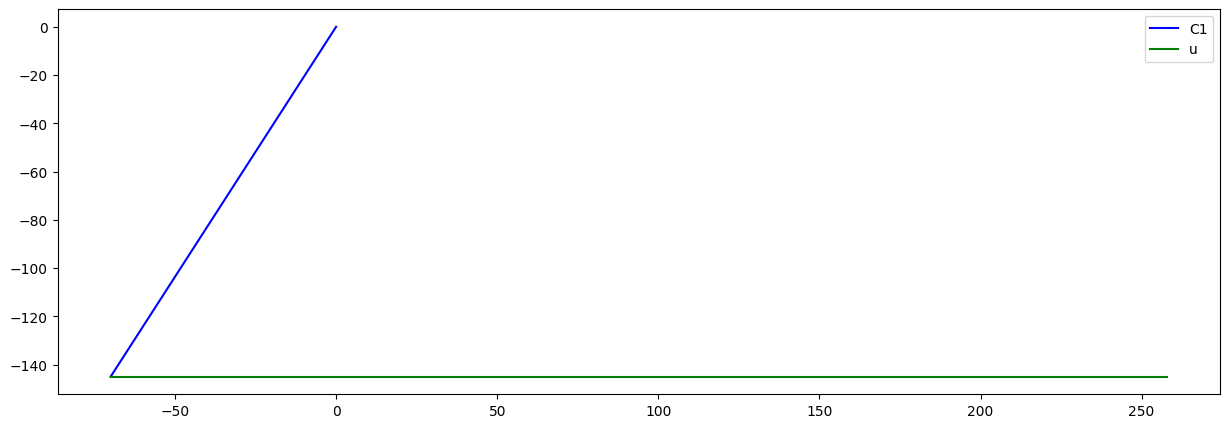

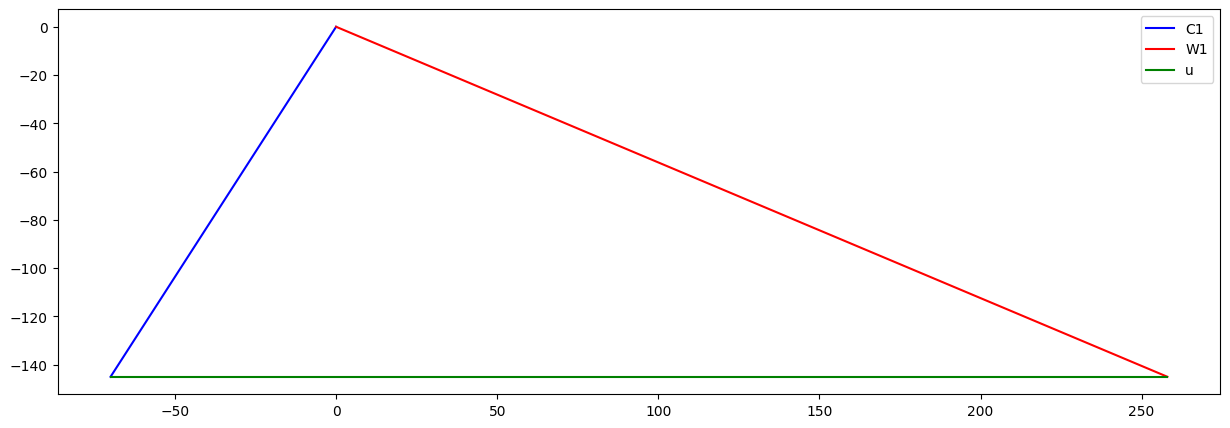

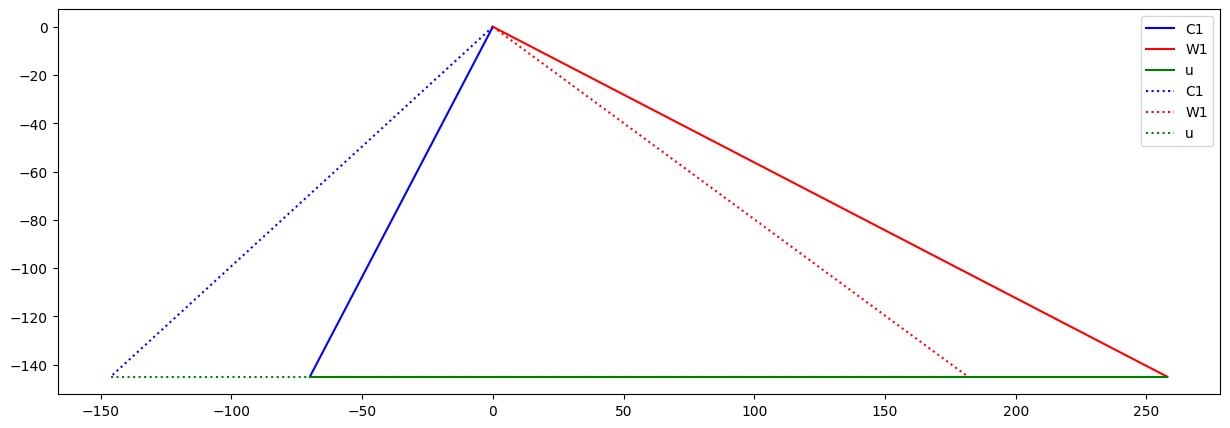

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize

MPa = 1e6
to_kelvin = lambda x: x + 273.15
kJ = 1e3
MW = 1e6

average_diameter = 0.5
u = 328 #м/с

c1_a = 145
c1_u = 70
stage_work = 25 * kJ

w1_a = c1_a
w2_a = c1_a
c2_a = c1_a

def plot_triangle(
    ax,
    u = None,
    c_a = None,
    c_u = None,
    w_a = None,
    w_u = None,
    **kwargs,
):
    if c_u and c_a:
        ax.plot([0, -c_u], [0, -c_a], label='C1', color='blue', **kwargs)
    if w_u and w_a:
        ax.plot([0, -w_u], [0, -w_a], label='W1', color='red', **kwargs)
    if (c_u and c_a) or (w_u and w_a):
        if c_u and c_a:
            ax.plot([-c_u, -c_u + u], [-c_a, -c_a], label='u', color='green', **kwargs)
        else:
            ax.plot([-w_u, -w_u - u], [-w_a, -w_a], label='u', color='green', **kwargs)
    ax.legend()

fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c1_u, c_a=c1_a, linestyle="-")

w1_u = c1_u - u
     

fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c1_u, c_a=c1_a, w_a=w1_a, w_u=w1_u, linestyle="-")

w_1 = (w1_a ** 2 + w1_u ** 2) ** 0.5

beta_1 = np.rad2deg(np.arccos(w1_u / w_1))

del_w_u = stage_work / u

w2_u = w1_u + del_w_u

w_2 = (w2_a ** 2 + w2_u**2) ** 0.5

beta_2 = np.rad2deg(np.arccos(w2_u / w_2))

delta_beta = beta_1 - beta_2
print("угол поворота в рабочем колесе", delta_beta)
print("относительная скоротсь входа", w_1)
print("относительная скорость выхода", w_2)

delta_c_u = del_w_u
c2_u = c1_u + delta_c_u

fig, ax = plt.subplots(1, 1, figsize=(15,5))
plot_triangle(ax=ax, u=u, c_u=c1_u, c_a=c1_a, w_a=w1_a, w_u=w1_u, linestyle="-")
plot_triangle(ax=ax, u=u, w_a=w2_a, w_u=w2_u, c_a=c2_a, c_u=c2_u, linestyle=":")